In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### テストデータを生成します。

In [19]:
Nclass = 500

X1 = np.random.randn(Nclass, 2) + np.array([0, -2])
X2 = np.random.randn(Nclass, 2) + np.array([2, 2])
X3 = np.random.randn(Nclass, 2) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])
Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

In [20]:
X

array([[ 0.76413755, -1.74932394],
       [-0.13479998, -2.01789564],
       [-0.59148954, -2.42594154],
       ..., 
       [-2.82860322,  2.04079973],
       [-2.01952935,  2.54933243],
       [-2.50537736,  2.07832983]])

In [21]:
Y

array([0, 0, 0, ..., 2, 2, 2])

##### データの分布を確認します


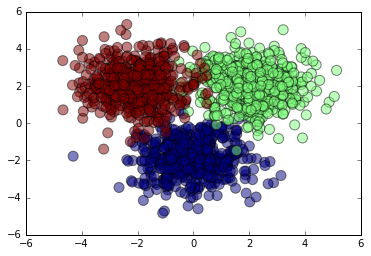

In [22]:
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

###### 重みを初期化しましょう

In [23]:
# randomly initialize weights
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

In [24]:
W2

array([[-0.31989438,  0.2342324 ,  2.13826526],
       [ 0.56546947,  0.3117762 , -0.86110621],
       [-0.5896379 ,  0.35770102,  0.2385969 ]])

In [25]:
def softmax(X):
    expX = np.exp(X)
    return expX / expX.sum(axis=1, keepdims=True)


In [26]:
def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    A = Z.dot(W2) + b2
    return softmax(A)

In [27]:
def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

In [28]:
P_Y_given_X = forward(X, W1, b1, W2, b2)
P = np.argmax(P_Y_given_X, axis=1)

In [29]:
P_Y_given_X

array([[ 0.11361595,  0.82071787,  0.06566618],
       [ 0.11166629,  0.82187947,  0.06645424],
       [ 0.11176932,  0.82154881,  0.06668187],
       ..., 
       [ 0.03489051,  0.84727656,  0.11783293],
       [ 0.03468578,  0.84631819,  0.11899603],
       [ 0.03503226,  0.84819179,  0.11677596]])

In [30]:
P.tolist()

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [31]:
assert(len(P) == len(Y))

print("Classification rate for randomly chosen weights: %.3f"%(classification_rate(Y, P)))
print("It's fine if classification rate is nearly 0.33 cuz its weights are randomly chosen and the prediction would also be random.")

Classification rate for randomly chosen weights: 0.333
It's fine if classification rate is nearly 0.33 cuz its weights are randomly chosen and the prediction would also be random.
